 ## Single Variable Linear Regression Analysis of Children's Vs. Parent's Height

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
 
data = "http://www.randomservices.org/random/data"

In [2]:
df = pd.read_csv('family.txt', delimiter = '\t')
df

,Family,Dad,Mom,Gender,Height_of_a_Child,Number_of_Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4
...,...,...,...,...,...,...
893,136A,68.5,65.0,M,68.5,8
894,136A,68.5,65.0,M,67.7,8
895,136A,68.5,65.0,F,64.0,8
896,136A,68.5,65.0,F,63.5,8


In [3]:
print("\n", df.describe())   # Print out the basic numerical statistics of each column
print("\n", df.dtypes)   # Print out the data types of each column
print("\n", df.head())   # Print out column headers as well as the first 5 records


               Dad         Mom  Height_of_a_Child  Number_of_Kids
count  898.000000  898.000000         898.000000      898.000000
mean    69.232851   64.084410          66.760690        6.135857
std      2.470256    2.307025           3.582918        2.685156
min     62.000000   58.000000          56.000000        1.000000
25%     68.000000   63.000000          64.000000        4.000000
50%     69.000000   64.000000          66.500000        6.000000
75%     71.000000   65.500000          69.700000        8.000000
max     78.500000   70.500000          79.000000       15.000000

 Family                object
Dad                  float64
Mom                  float64
Gender                object
Height_of_a_Child    float64
Number_of_Kids         int64
dtype: object

   Family   Dad   Mom Gender  Height_of_a_Child  Number_of_Kids
0      1  78.5  67.0      M               73.2               4
1      1  78.5  67.0      F               69.2               4
2      1  78.5  67.0      F     

In [4]:
# Extract data values to fit to a model 

# d is the Dad Height, c is the Child Height, D is for manipulated Dad Height:
d=pd.Series(df['Dad'])
c=pd.Series(df['Height_of_a_Child'])
D = d[:,np.newaxis]   # manipulate shape from 1D Array/Series to a 2D Column Array
 
# m is the Mom Height, c is the Child Height, M is for manipulated Mom Height:
m=pd.Series(df['Mom'])
c=pd.Series(df['Height_of_a_Child'])
M = m[:,np.newaxis]   # manipulate shape from 1D Array/Series to a 2D Column Array

In [5]:
print("Data Frame 'df' Columns: ",df.columns)
print("Number of Rows: ", len(df))
print("d shape: ", d.shape)
print("c shape: ", c.shape)
print("D shape: ", D.shape)

print("")

print("m shape: ", m.shape)
print("c shape: ", c.shape)
print("M shape: ", M.shape)

Data Frame 'df' Columns:  Index(['Family', 'Dad', 'Mom', 'Gender', 'Height_of_a_Child',
       'Number_of_Kids'],
      dtype='object')
Number of Rows:  898
d shape:  (898,)
c shape:  (898,)
D shape:  (898, 1)

m shape:  (898,)
c shape:  (898,)
M shape:  (898, 1)


In [6]:
# Creating a Linear Regression model between the Dad's height and the child's height
Dmodel = LinearRegression(fit_intercept=True)
Dmodel.fit(D,c)
print('Dad Coefficient: \n', Dmodel.coef_)
print('')
print('Dad Intercept: \n', Dmodel.intercept_)

print("")

# Creating a Linear Regression model between the Mom's height and the child's height
Mmodel = LinearRegression(fit_intercept=True)
Mmodel.fit(M,c)
print('Mom Coefficient: \n', Mmodel.coef_)
print('')
print('Mom Intercept: \n', Mmodel.intercept_)

Dad Coefficient: 
 [0.39938127]

Dad Intercept: 
 39.110386837075396

Mom Coefficient: 
 [0.31317952]

Mom Intercept: 
 46.69076592846473


In [7]:
# Predicting a height value for a child using the Linear Model above between the Dad and the child
cpred = Dmodel.predict([[75]])
print("Prediction for Child's height using the Dad's height:",cpred.round(2))
cpred = Dmodel.predict([[60]])
print("Prediction for Child's height using the Dad's height:",cpred.round(2))

print("")

# Predicting a height value for a child using the Linear Model above between the Mom and the child
cpred = Mmodel.predict([[75]])
print("Prediction for Child's height using Mom's height:",cpred.round(2))
cpred = Mmodel.predict([[60]])
print("Prediction for Child's height using Mom's height:",cpred.round(2))

Prediction for Child's height using the Dad's height: [69.06]
Prediction for Child's height using the Dad's height: [63.07]

Prediction for Child's height using Mom's height: [70.18]
Prediction for Child's height using Mom's height: [65.48]


In [8]:
inputs = np.linspace(60, 80)   # series of 50 (default) numbers between 60 and 80

Dpred = inputs[:, np.newaxis]   # manipulate shape from 1D Array/Series to a 2D Column Array
cpred = Dmodel.predict(Dpred)

Mpred = inputs[:, np.newaxis]   # manipulate shape from 1D Array/Series to a 2D Column Array
cpred = Mmodel.predict(Mpred)

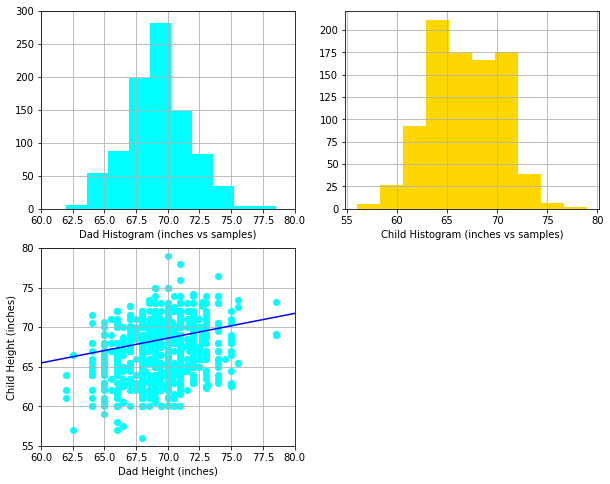

In [9]:
plt.figure(1, (10,8)) # 10 x 8 figure
 
# Histogram of d (Dad's height)
plt.subplot(2,2,1)
plt.hist(d, color="aqua")
plt.axis([60,80,0,300])
plt.grid(True)
plt.xlabel("Dad Histogram (inches vs samples)")

# Histogram of c (Child's Height)
plt.subplot(2,2,2)
plt.hist(c, color="gold")
plt.grid(True)
plt.xlabel("Child Histogram (inches vs samples)")

# Scatter plot with line-fit
plt.subplot(2,2,3)
plt.scatter(d,c, color="aqua")
plt.plot(Dpred,cpred, color="blue")
plt.axis([60,80,55,80])
plt.grid(True)
plt.xlabel("Dad Height (inches)")
plt.ylabel("Child Height (inches)")
 
plt.show()

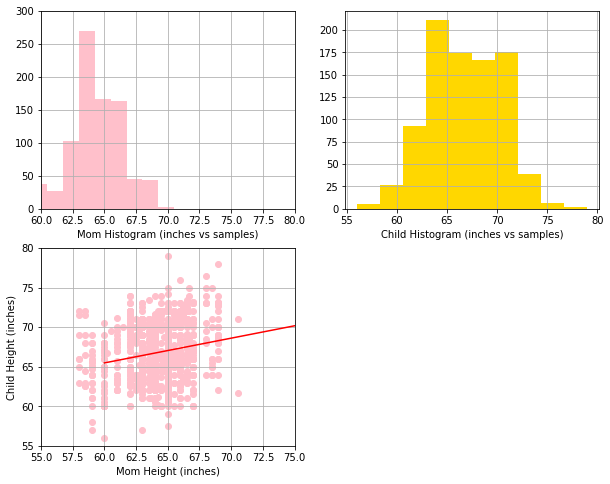

In [10]:
plt.figure(1, (10,8)) # 10 x 8 figure
 
# Histogram of m (Mom's height)
plt.subplot(2,2,1)
plt.hist(m, color="pink")
plt.axis([60,80,0,300])
plt.grid(True)
plt.xlabel("Mom Histogram (inches vs samples)")

# Histogram of c (Child's Height)
plt.subplot(2,2,2)
plt.hist(c, color="gold")
plt.grid(True)
plt.xlabel("Child Histogram (inches vs samples)")

# Scatter plot with line-fit
plt.subplot(2,2,3)
plt.scatter(m,c, color="pink")
plt.plot(Dpred,cpred, color="red")
plt.axis([55,75,55,80])
plt.grid(True)
plt.xlabel("Mom Height (inches)")
plt.ylabel("Child Height (inches)")
 
plt.show()

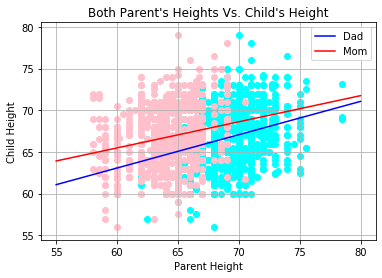

In [11]:
# Create 2 models similar to the above - one for the Dad-Child height, one for the Mom-Child height relationship

two_Dmodel = LinearRegression(fit_intercept=True)
two_Mmodel = LinearRegression(fit_intercept=True)
 
two_Dmodel.fit(D,c) # reshape to create "n" by 1 array
two_Mmodel.fit(M,c)
 
two_inputs = np.linspace(55, 80).reshape(-1,1)
two_Dpred = two_Dmodel.predict(two_inputs)
two_Mpred = two_Mmodel.predict(two_inputs)
 
plt.scatter(df['Dad'], df['Height_of_a_Child'], color="aqua")
plt.scatter(df['Mom'], df['Height_of_a_Child'], color="pink")
 
plt.plot(two_inputs,two_Dpred, color="blue")
plt.plot(two_inputs,two_Mpred, color="red")
plt.grid(True)

plt.legend(["Dad", "Mom"])
plt.xlabel("Parent Height")
plt.ylabel("Child Height")
plt.title("Both Parent's Heights Vs. Child's Height")
 
plt.show()

In [12]:
# Data preparation to center heights to eventually normalize them

dad_centered = df['Dad'] - np.mean(df['Dad'])
mom_centered = df['Mom'] - np.mean(df['Mom'])
child_centered = df['Height_of_a_Child'] - np.mean(df['Height_of_a_Child'])
 
Dmodel.fit(dad_centered.values.reshape(-1,1), child_centered)
print('Coefficient: \n', Dmodel.coef_)
print('Intercept: \n', Dmodel.intercept_)
 
print("")
    
Mmodel.fit(mom_centered.values.reshape(-1,1), child_centered)
print('Coefficient: \n', Mmodel.coef_)
print('Intercept: \n', Mmodel.intercept_)

Coefficient: 
 [0.39938127]
Intercept: 
 4.9365959103391907e-14

Coefficient: 
 [0.31317952]
Intercept: 
 6.806597041868856e-14


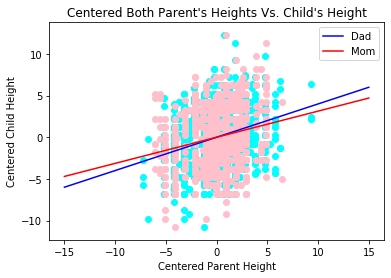

In [13]:
# Center data around zero

fin_inputs = np.linspace(-15, 15).reshape(-1,1)
fin_Dpred = Dmodel.predict(fin_inputs)
fin_Mpred = Mmodel.predict(fin_inputs)
 
plt.scatter(dad_centered, child_centered, color="aqua")
plt.scatter(mom_centered, child_centered, color="pink")
 
plt.plot(fin_inputs, fin_Dpred, color="blue")
plt.plot(fin_inputs, fin_Mpred, color="red")
 
plt.legend(["Dad", "Mom"])
plt.xlabel("Centered Parent Height")
plt.ylabel("Centered Child Height")
plt.title("Centered Both Parent's Heights Vs. Child's Height")
plt.show()

In [14]:
# Centered both parent's heights against the child's height
# Centerd data should have Std Dev. of about 1

Zd = dad_centered / np.std(dad_centered)
Zm = mom_centered / np.std(mom_centered)
Zc = child_centered / np.std(child_centered)
 
print("Centered Dad's data standard deviation:", np.std(Zd))
print("Centered Mom's data standard deviation:", np.std(Zm))
print("Centered Child's data standard deviation:", np.std(Zc))

Centered Dad's data standard deviation: 1.0000000000000004
Centered Mom's data standard deviation: 0.9999999999999991
Centered Child's data standard deviation: 0.9999999999999978


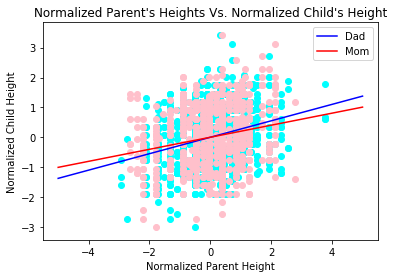

In [15]:
# Normalized both parent's heights against the child's height 

Dmodel.fit(Zd.values.reshape(-1,1),Zc)
Mmodel.fit(Zm.values.reshape(-1,1),Zc)
 
norm_inputs = np.linspace(-5, 5).reshape(-1,1)
norm_Dpred = Dmodel.predict(norm_inputs)
norm_Mpred = Mmodel.predict(norm_inputs)
 
plt.scatter(Zd,Zc, color="aqua")
plt.scatter(Zm,Zc, color="pink")
 
plt.plot(norm_inputs,norm_Dpred, color="blue")
plt.plot(norm_inputs,norm_Mpred, color="red")
 
plt.legend(["Dad", "Mom"])
plt.xlabel("Normalized Parent Height")
plt.ylabel("Normalized Child Height")
plt.title("Normalized Parent's Heights Vs. Normalized Child's Height")
 
plt.show()